In [3]:

from pytrends.request import TrendReq 
import pytrends
import pandas as pd
import pytz
import matplotlib.pyplot as plt

In [4]:
#tz = pytz.timezone('Australia/Perth')
pytrend = TrendReq(hl='en-US', tz=-480)  # initialise TrendReq


kw_list = ["indian food"]
location = 'AU-WA'
cat = '0'
timeframe = 'now 7-d'
pytrend.build_payload(kw_list, cat=cat, timeframe=timeframe, geo=location, gprop='')

trends = pytrend.related_queries() # Build pytrends payload and query

kwTop = trends[kw_list[0]]["top"] # kwTop to store the results of top trends similar to the keyword.
kwTop

,query,value
0,indian food near me,100
1,food near me,99
2,indian restaurant near me,29
3,2 fat indian,11
4,chinese food near me,10


In [5]:
kw_list_group = []
for row in range(len(kwTop)):
    search_term = kwTop.loc[row,'query']
    accurate_word = "indian"
    if accurate_word in search_term:
        kw_list_group.append(search_term)
kw_list_group

['indian food near me', 'indian restaurant near me', '2 fat indian']

In [6]:
pytrend.build_payload(kw_list_group, cat=0, timeframe='2017-01-01 2022-12-1', geo='AU-WA', gprop='')
pytrend_df = pytrend.interest_over_time()

In [7]:
kwIOT_df = pd.DataFrame()

for i in range(len(kw_list_group)):
    word = kw_list_group[i]
    kwIOT = pytrend_df[kw_list_group[i]] # kwTop to store the results of top trends similar to the keyword.
    kwIOTi = kwIOT.to_frame()
    kwIOT_df = kwIOT_df.append(kwIOTi[word])
    

In [8]:
kwIOT_df=kwIOT_df.T


In [9]:
kwIOT_df['total count'] = kwIOT_df[kw_list_group].sum(axis=1)

In [10]:
kwIOT_df

,indian food near me,indian restaurant near me,2 fat indian,total count
2017-01-01,4.0,32.0,0.0,36.0
2017-02-01,0.0,23.0,9.0,32.0
2017-03-01,4.0,22.0,9.0,35.0
2017-04-01,5.0,39.0,8.0,52.0
2017-05-01,0.0,42.0,8.0,50.0
...,...,...,...,...
2022-08-01,9.0,84.0,21.0,114.0
2022-09-01,32.0,81.0,17.0,130.0
2022-10-01,24.0,86.0,13.0,123.0
2022-11-01,22.0,69.0,13.0,104.0


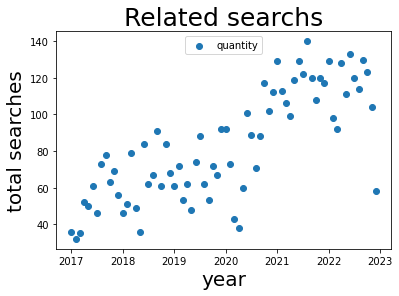

In [11]:
x = kwIOT_df.index
y = kwIOT_df['total count']
plt.scatter(x,y)
plt.title("Related searchs",fontsize=25)
plt.legend(['quantity'], loc='upper center')
plt.xlabel('year', fontsize=20)
plt.ylabel('total searches', fontsize=20)
plt.show()